In [1]:
import numpy as np
from math import pi, sqrt, tanh
import matplotlib.pyplot as plt
# from quimb import *
import time


In [2]:
def Hilbertspace_Zr(N,r):

    states=np.zeros((r**N,N),dtype=int)

    for i_1 in range(r**N):
        num_str=np.base_repr(i_1,base=r)[::-1]
        for i_2 in range(len(num_str)):
            states[i_1,i_2]=int(num_str[i_2])

    return states
# print( np.arange(int(r**(N-1)))  )
# print(states)

def p_transpose_2(V,Na,Nb):
# partial transpose with respect to subsystem 2
# the basis of NaxNb density matrix is defined by Nb*(i-1)+j,
# i,j=1,2,3 spans the Hilbert space of subsystem 1 and 2 respectively
    U=np.zeros((Na*Nb,Na*Nb), dtype=np.complex128)
    for i_1 in range(Na):
        for i_2 in range(Na):
#             print(V[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)].shape)
            U[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)]=np.transpose(V[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)])

    return U


def rand_u(Nc):
    M = np.random.randn(Nc,Nc)+1j*np.random.randn(Nc,Nc)
    Q,R = np.linalg.qr(M)
    r = np.diag(R)
    L = np.diag(r/np.abs(r))
    Q = np.dot(Q,L)
    return Q

In [9]:
Nrep=10
r=2 # local Hilbert space dim

Lab=10
Lc=4
L=Lab+Lc

Nc=r**Lc
Nab=r**Lab

neg=np.zeros( (int(Lab/2),Nrep) )
v1b=np.zeros((Nrep*Nab,int(Lab/2)))

t_timer=time.time()
# np.random.seed(1)

for i_r in range(Nrep):
    print(i_r, end='\r')
    #### no symmetry
    X=np.random.randn(Nab,Nc)+1j*np.random.randn(Nab,Nc)

    mat=np.dot(X,np.matrix(X).H)
    rho= mat / np.trace(mat)
    
    l1 , evec1 = np.linalg.eigh(rho)
    
    where_positive = np.argwhere((Nab*l1)>1e-6)
    inds =np.reshape(where_positive,[1,len(where_positive)])[0]
    vec = 0
    for i_1 in range(len(inds)):
        vec += sqrt(l1[inds[i_1]])*np.kron(evec1[:,inds[i_1]], np.conj(evec1[:,inds[i_1]]) ) 
    
    vec = np.reshape(vec,[Na,Nab*Nb]).T
    rBB = zeros( (Nb**2,Nb**2))
    for i_1 in range(Na):
        vmat = np.reshape(vec[:,i_1],[Nb,Nab]).T
        for i_2 in range(Nb):
            vmatb[] = np.reshape(vmat[:,i_2],[Na,Nb]).T
#             rBB[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)] += np.dot(vmatb,np.martix(vmatb).H)
            
    rho = mat / np.trace(mat)

    
    for i_n in range(int(Lab/2)):
        Na=r**(i_n+1)
        Nb=r**(Lab-i_n-1)
        rT2b = p_transpose_2(rho,Na,Nb)
        l1T=np.linalg.eigvalsh(rT2b)
        v1b[i_r*Nab:(i_r+1)*Nab,i_n] = (Nab)*l1T
        neg[i_n,i_r] = np.log2(sum(abs(l1T)))
        


elapsed = time.time() - t_timer
print("Finished, elapsed time = %.2f " % (elapsed)+ "sec")

Finished, elapsed time = 6.76 sec


In [15]:
a = np.arange(12)
np.reshape(a,[4,3])

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

(0.0, 0.04)

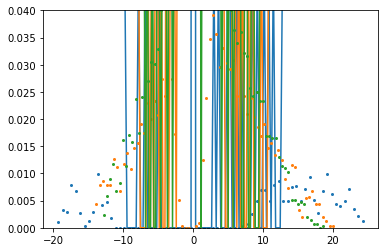

In [53]:
for i_n in range(int(Lab/2)):
    Na=r**(i_n+1)
    Nb=r**(Lab-i_n-1)

    num_bins = 70

    n, bin_edges = np.histogram(v1[:,i_n], bins=num_bins)
    bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
    n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])
    plt.plot(bins_center,n,'-',markersize=2,color='C%d' % (i_n),label=r'$N_{A_1}=%d$' % (i_n+1) )


    n, bin_edges = np.histogram(v1_p[:,i_n], bins=num_bins)
    bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
    n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])
    plt.plot(bins_center,n,'o',markersize=2,color='C%d' % (i_n),label=r'$N_{A_1}=%d$' % (i_n+1) )

plt.ylim([0,0.04])

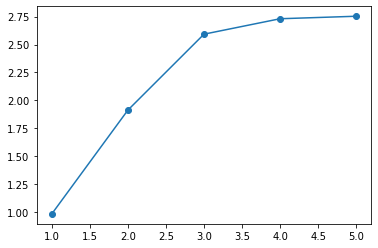

In [10]:
# plt.plot(np.arange(1,int(Lab/2)+1),neg.T,"o-")
plt.plot(np.arange(1,int(Lab/2)+1),np.mean(neg,axis=1),"o-")
plt.show()

In [228]:
Nrep=1
r=2 # local Hilbert space dim

La = 5
Lb = 5
Lab=La+Lb
Lc=4
L=Lab+Lc

Na = r**La
Nb = r**Lb
Nab=r**Lab
Nc=r**Lc

neg_p=np.zeros( (Nrep,int(Lab/2)) )
minABC= min(Nab,Nc)
v2=np.zeros(Nrep*minABC)
v3=np.zeros(Nrep*Nab)
vT=np.zeros(Nrep*Nab)
vT_before=np.zeros(Nrep*Nab)

neg=np.zeros(Nrep)
neg_before=np.zeros(Nrep)

t_timer=time.time()
# np.random.seed(1)

for i_r in range(Nrep):
    print(i_r, end='\r')

    #### no symmetry
    X=np.random.randn(Nab,Nc)+1j*np.random.randn(Nab,Nc)

    mat=np.dot(X,np.matrix(X).H)
    rho= mat / np.trace(mat)

    rT2b = p_transpose_2(rho,Na,Nb)
    l1T=np.linalg.eigvalsh(rT2b)
    vT_before[i_r*Nab:(i_r+1)*Nab] = (Nab)*l1T
    neg_before[i_r] = np.log2(sum(abs(l1T)))
    
#     v2[i_r*Nab:(i_r+1)*Nab]=(Nab)*np.linalg.eigvalsh(rho)
    l1 , evec1 = np.linalg.eigh(rho)
#     v2[i_r*Nab:(i_r+1)*Nab]=(Nab)*l1
    where_positive = np.argwhere((Nab*l1)>1e-6)
    inds =np.reshape(where_positive,[1,len(where_positive)])[0]
#     print(inds)
    v2[i_r*minABC:(i_r+1)*minABC] = Nab*l1[inds]
     
    mat = np.dot(evec1[:,inds],np.matrix(evec1[:,inds]).H)
    rho = mat / np.trace(mat)
    v3[i_r*Nab:(i_r+1)*Nab] = Nab*np.linalg.eigvalsh(rho)

    rT2b = p_transpose_2(rho,Na,Nb)
    l1T=np.linalg.eigvalsh(rT2b)
    vT[i_r*Nab:(i_r+1)*Nab] = (Nab)*l1T
    neg[i_r] = np.log2(sum(abs(l1T)))


#     Xp = Xu[:,0:int(Nc/2)]
#     mat=np.dot(Xp,np.matrix(Xp).H)
#     rho_p= mat / np.trace(mat)

#     for i_n in range(int(Lab/2)):
#         Na=r**(i_n+1)
#         Nb=r**(Lab-i_n-1)
#         rT2b = p_transpose_2(rho_p,Na,Nb)
#         l1T=np.linalg.eigvalsh(rT2b)
#         neg_p[i_r,i_n] = np.log(sum(abs(l1T)))
#         v1_p[i_r*Nab:(i_r+1)*Nab,i_n] = (Nab)*l1T

elapsed = time.time() - t_timer
print("Finished, elapsed time = %.2f " % (elapsed)+ "sec")

Finished, elapsed time = 0.59 sec


1008

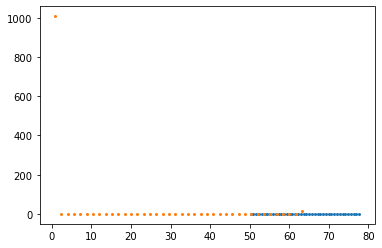

In [236]:
n, bin_edges = np.histogram(v2, bins=num_bins)
bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
# n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])
plt.plot(bins_center,n,'.',markersize=msize)#,label=r'$N_{A_1}=%d$' % (i_n+1) )


n, bin_edges = np.histogram(v3, bins=num_bins)
bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
# n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])
plt.plot(bins_center,n,'.',markersize=msize)#,label=r'$N_{A_1}=%d$' % (i_n+1) )

max(n)

In [237]:
Nc

16

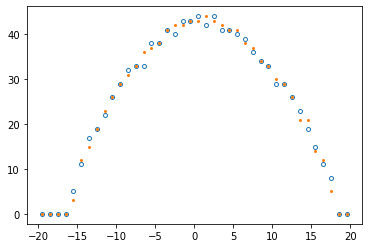

In [229]:

num_bins = 40
msize = 4

bins= np.linspace(-20,20,num_bins+1)

n, bin_edges = np.histogram(vT_before, bins=bins)
bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
# n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])
plt.plot(bins_center,n,'o',fillstyle='none',markersize=msize)#,label=r'$N_{A_1}=%d$' % (i_n+1) )

n, bin_edges = np.histogram(vT, bins=bins)
bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
# n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])
plt.plot(bins_center,n,'.',markersize=msize)#,label=r'$N_{A_1}=%d$' % (i_n+1) )

# plt.ylim([-0.01,.1])

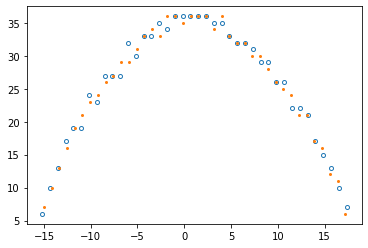

In [225]:

num_bins = 40
msize = 4
# n, bin_edges = np.histogram(v2, bins=num_bins)
# bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
# n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])
# plt.plot(bins_center,n,'.',markersize=msize)#,label=r'$N_{A_1}=%d$' % (i_n+1) )


# n, bin_edges = np.histogram(v3, bins=num_bins)
# bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
# n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])
# plt.plot(bins_center,n,'.',markersize=msize)#,label=r'$N_{A_1}=%d$' % (i_n+1) )


n, bin_edges = np.histogram(vT_before, bins=num_bins)
bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
# n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])
plt.plot(bins_center,n,'o',fillstyle='none',markersize=msize)#,label=r'$N_{A_1}=%d$' % (i_n+1) )

n, bin_edges = np.histogram(vT, bins=num_bins)
bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
# n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])
plt.plot(bins_center,n,'.',markersize=msize)#,label=r'$N_{A_1}=%d$' % (i_n+1) )

# plt.ylim([-0.01,.1])

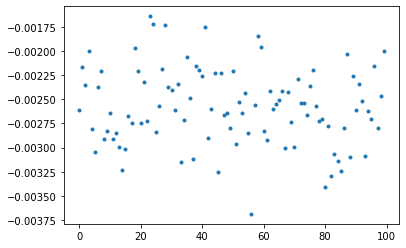

In [205]:
plt.plot(neg - neg_before,'.')

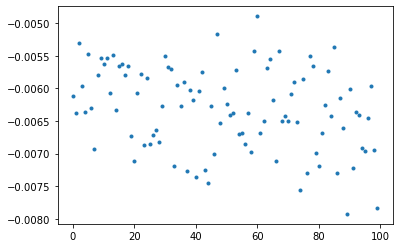

In [208]:
plt.plot(neg - neg_before,'.')

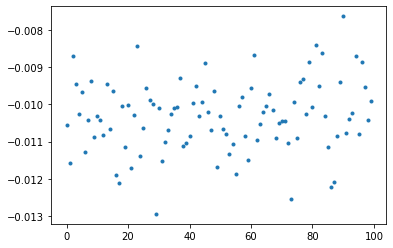

In [215]:
plt.plot(neg - neg_before,'.')
# plt.plot(neg_before,neg,'.')

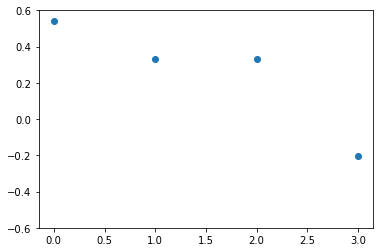

In [219]:
y= np.array([1/6*(1+sqrt(5)),1/3,1/3,1/6*(1-sqrt(5))])
plt.plot(y,"o")
plt.ylim(-0.6,0.6);